In [32]:
#PATH_data = f"../abyss_data/"
#Mount external drive: sudo mount -t drvfs D: /mnt/d
PATH_data = f"/mnt/d/abyss_data/"
PATH_GENO = f"{PATH_data}genotype"
PATH_SUMSTAT = f"{PATH_data}sumstat/mono/"
PATH_SUMSTAT_no_corr = f"{PATH_data}sumstat_no_corr"
PATH_GENO_segmented = f"{PATH_GENO}/segmented/"
PATH_GENO_mini_dim = f"{PATH_GENO}/mini_dim/"
PATH_GENO_maf = f"{PATH_GENO}/maf/"

PATH_PHENO = f"{PATH_data}phenotype/"
PATH_PHENO_ancestry = f"{PATH_PHENO}/ancestry/all.panel"
PATH_PLOTS = f"{PATH_data}plots/"
PATH_PARAMS = './hyper_params_to_test_AF.txt'

In [33]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd  # Import Pandas and Numpy to create databases
from collections import Counter
import os
from os import listdir
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '4'

In [34]:
effect = 1
chrom = 22
maf_causal_snp = 0.01
sit = "strat_causal"

In [35]:
path_genos = PATH_GENO_segmented + f"chrom_{chrom}/unshuffled/"


In [36]:
onlyfiles_input = [f for f in listdir(
    path_genos) if maf_causal_snp + maf_causal_snp/5 > float(f.split('_')[5]) > maf_causal_snp - maf_causal_snp/5]


In [37]:
popped = onlyfiles_input[round(len(onlyfiles_input)/2)]
snp_nr = 0

In [38]:
popped

'11_5_833_11_maf_0.0098_0.015.pkl'

In [39]:
os.system(f"mkdir {PATH_SUMSTAT}maf_causal_{maf_causal_snp}")

mkdir: cannot create directory ‘/mnt/d/abyss_data/sumstat/mono/maf_causal_0.01’: File exists


256

In [40]:
os.system(f"mkdir {PATH_SUMSTAT}maf_causal_{maf_causal_snp}/{chrom}")


mkdir: cannot create directory ‘/mnt/d/abyss_data/sumstat/mono/maf_causal_0.01/22’: File exists


256

In [41]:
PATH_mono = f"{PATH_SUMSTAT}maf_causal_{maf_causal_snp}"


In [42]:
try:
  causal_file = [f for f in listdir(
      PATH_mono) if f.startswith("from_chrom")][0]
  snps = pd.read_pickle(f"{PATH_mono}/{causal_file}")
except Exception as e:
  print(e)
  snps = pd.read_pickle(path_genos+popped)
  snps.to_pickle(f"{PATH_mono}/from_chrom_{chrom}_{popped}")
  snp = snps.iloc[:, snp_nr]
  name = snps.columns[snp_nr]
  snp.to_pickle(f"{PATH_mono}/causal_snp_{name}.pkl")

In [43]:
causal_file = [f for f in listdir(PATH_mono) if f.startswith("from_chrom")][0]


In [44]:
humans = pd.read_pickle(f"{PATH_data}sumstat/humans_no_causal.pkl")


In [45]:
snps = pd.read_pickle(f"{PATH_mono}/{causal_file}")

name = snps.columns[snp_nr]

snp_effect = snps.iloc[:, snp_nr] * effect
#snp_effect = snps.iloc[:, snp_nr] * (effect/float(maf.split('_')[0]))

humans['no_strat_causal'] = humans['no_strat_no_causal']
humans['strat_causal'] = humans['strat_no_causal']

humans['no_strat_causal'] = humans['no_strat_causal'] + snp_effect
humans['strat_causal'] = humans['strat_causal'] + snp_effect

In [46]:
print(Counter(snp_effect).keys())

dict_keys([1, 0, -1])


In [47]:
os.system(f"mkdir {PATH_SUMSTAT}maf_causal_{maf_causal_snp}/{chrom}/{sit}")


0

In [48]:
path_output = f"{PATH_SUMSTAT}maf_causal_{maf_causal_snp}/{chrom}/{sit}/"


In [49]:
pheno = np.array(humans[sit])

In [50]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [51]:
onlyfiles_input = [f for f in listdir(path_genos)]

In [52]:
"""
for file in onlyfiles_input:
    path_file = path_genos + '/' + file
    genos = pd.read_pickle(path_file)    
    X = genos
    y = pheno
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    sumstat = pd.DataFrame(data={
        'snp': list(est2.pvalues.index)[1:],
        'coef': list(est2.params)[1:],
        'std_err': list(est2.bse)[1:],
        't': list(est2.tvalues)[1:],
        'P': list(est2.pvalues[1:]),
        '0.025': list(est2.conf_int()[0])[1:],
        '0.975': list(est2.conf_int()[1])[1:]
    })
    sumstat['#CHROM'] = sumstat['snp'].str[:2].astype(int)
    sumstat['POS'] = [i.split(':', 1)[0]
                      for i in list(sumstat['snp'].str[3:-5])]
    sumstat['POS'] = sumstat['POS'].astype(int)
    sumstat['-logp'] = - np.log10(sumstat['P'])
    sumstat.to_pickle(f"{path_output}/{file}")
"""


'\nfor file in onlyfiles_input:\n    path_file = path_genos + \'/\' + file\n    genos = pd.read_pickle(path_file)    \n    X = genos\n    y = pheno\n    X2 = sm.add_constant(X)\n    est = sm.OLS(y, X2)\n    est2 = est.fit()\n    sumstat = pd.DataFrame(data={\n        \'snp\': list(est2.pvalues.index)[1:],\n        \'coef\': list(est2.params)[1:],\n        \'std_err\': list(est2.bse)[1:],\n        \'t\': list(est2.tvalues)[1:],\n        \'P\': list(est2.pvalues[1:]),\n        \'0.025\': list(est2.conf_int()[0])[1:],\n        \'0.975\': list(est2.conf_int()[1])[1:]\n    })\n    sumstat[\'#CHROM\'] = sumstat[\'snp\'].str[:2].astype(int)\n    sumstat[\'POS\'] = [i.split(\':\', 1)[0]\n                      for i in list(sumstat[\'snp\'].str[3:-5])]\n    sumstat[\'POS\'] = sumstat[\'POS\'].astype(int)\n    sumstat[\'-logp\'] = - np.log10(sumstat[\'P\'])\n    sumstat.to_pickle(f"{path_output}/{file}")\n'

In [53]:
for file in onlyfiles_input:
    path_file = path_genos + '/' + file
    genos = pd.read_pickle(path_file)
    snps_names = []
    coefs = []
    std_errs = []
    ts = []
    ps = []
    twenys = []
    ninetys = []
    for snp_name in genos:
      X = genos[snp_name]
      X2 = sm.add_constant(X)
      y = pheno
      est = sm.OLS(y, X2)
      est2 = est.fit()
      y = pheno
      X2 = sm.add_constant(X)
      est = sm.OLS(y, X2)
      est2 = est.fit()
      snps_names.append(list(est2.pvalues.index)[1:][0])
      coefs.append(list(est2.params)[1:][0])
      std_errs.append(list(est2.bse)[1:][0])
      ts.append(list(est2.tvalues)[1:][0])
      ps.append(list(est2.pvalues[1:])[0])
      twenys.append(list(est2.conf_int()[0])[1:][0])
      ninetys.append(list(est2.conf_int()[1])[1:][0])
    sumstat = pd.DataFrame(data={ 
        'snp': snps_names,
        'coef': coefs,
        'std_err': std_errs,
        't': ts,
        'P': ps,
        '0.025': twenys,
        '0.975': ninetys
    })
    sumstat['#CHROM'] = sumstat['snp'].str[:2].astype(int)
    sumstat['POS'] = [i.split(':', 1)[0]
                      for i in list(sumstat['snp'].str[3:-5])]
    sumstat['POS'] = sumstat['POS'].astype(int)
    sumstat['-logp'] = - np.log10(sumstat['P'], where=sumstat['P'] > 0)
    sumstat.to_pickle(f"{path_output}/{file}")


In [54]:
path_sumstat = f"{PATH_SUMSTAT}maf_causal_{maf_causal_snp}/"

In [55]:
chrom_files = [f for f in listdir(path_sumstat) if f != causal_file]
chrom_files = [f for f in chrom_files if f != f"causal_snp_{name}.pkl"]
chrom_files = [f for f in chrom_files if f.split("_")[0] != f"GWAS"]

In [56]:
chrom_files

['21', '22']

In [57]:
sumstat_array = []
for chrom_file in chrom_files:
    sumstat_files = [f for f in listdir(path_sumstat + chrom_file + '/' + sit + "/")]
    # first do it with the first one
    path_file = path_sumstat + chrom_file + '/' + sit + '/' + sumstat_files[0]
    sumstats = pd.read_pickle(path_file)
    for sumstat_file in sumstat_files[1:]:
        path_file = path_sumstat + chrom_file + '/' + sit + '/' + sumstat_file
        temp = pd.read_pickle(path_file)
        sumstats = pd.concat([sumstats,temp])
    sumstat_array.append(sumstats)

sumstats = sumstat_array[0]
for sumstat in sumstat_array[1:]:
    sumstats = pd.concat([sumstats,sumstat]) 

In [58]:
sumstats = sumstats.reset_index(drop=True)

In [59]:
running_pos = 0
cumulative_pos = []
for chrom, group_df in sumstats.groupby('#CHROM'):
    cumulative_pos.append(group_df['POS'] + running_pos)
    running_pos += group_df['POS'].max()

sumstats['cumulative_pos'] = pd.concat(cumulative_pos)
sumstats['SNP number'] = sumstats.index

In [60]:
causal_chrom = causal_file.split("_")[2]

In [61]:
if sit == 'strat_causal':
  title = f"One causal snp with AF of {maf_causal_snp} on chrom {causal_chrom} with a population dependent phenotype"
elif sit == 'strat_no_causal':
  title = f"No causal snp but with a population dependent phenotype"
elif sit == "no_strat_causal":
  title = f"One causal snp with AF of {maf_causal_snp} on chrom {causal_chrom} with no population dependent phenotype"
else:
  title = f"No causal snp and no population dependent phenotype"
sit

'strat_causal'

In [62]:
title

'One causal snp with AF of 0.01 on chrom 21 with a population dependent phenotype'

In [63]:
sumstats

,snp,coef,std_err,t,P,0.025,0.975,#CHROM,POS,-logp,cumulative_pos,SNP number
0,21:10892322:A:G_A,-5.389286,7.712035,-0.698815,0.484733,-20.511912,9.733340,21,10892322,0.314498,10892322,0
1,21:47368531:A:G_G,8.411231,7.710954,1.090816,0.275459,-6.709276,23.531737,21,47368531,0.559943,47368531,1
2,21:32892189:A:G_G,3.225086,8.903945,0.362209,0.717227,-14.234773,20.684945,21,32892189,0.144344,32892189,2
3,21:15792338:A:C_C,-12.224644,7.708914,-1.585780,0.112916,-27.341151,2.891863,21,15792338,0.947246,15792338,3
4,21:25645657:G:T_T,-1.761544,7.712707,-0.228395,0.819358,-16.885488,13.362400,21,25645657,0.086526,25645657,4
...,...,...,...,...,...,...,...,...,...,...,...,...
479995,22:31587218:C:T_C,2.867584,0.589672,4.863017,0.000001,1.711289,4.023879,22,31587218,5.910876,79706852,479995
479996,22:37377737:C:T_T,-0.626874,0.634219,-0.988419,0.323043,-1.870521,0.616774,22,37377737,0.490740,85497371,479996
479997,22:30678530:A:G_A,-0.721991,0.603386,-1.196567,0.231589,-1.905179,0.461196,22,30678530,0.635282,78798164,479997
479998,22:27063804:C:G_G,0.508410,0.636206,0.799127,0.424292,-0.739135,1.755955,22,27063804,0.372335,75183438,479998


In [64]:
sumstats['causality'] = np.zeros(sumstats.shape[0])

In [65]:
sumstats['causality'].mask(sumstats['snp'] == name, 1, inplace=True)


In [66]:
sumstats = sumstats.sort_values(by=['causality'])


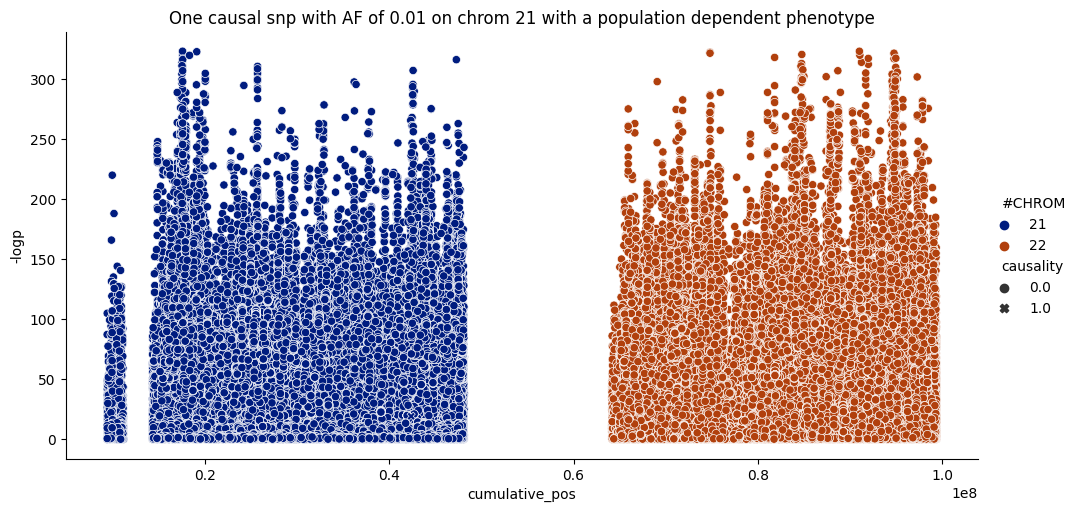

In [67]:
sns.relplot(
    data=sumstats,
    x='cumulative_pos',
    y='-logp',
    aspect=2,
    hue='#CHROM',
    style = "causality",
    palette='dark'
).set(title=title)
plt.savefig(f"{path_sumstat}/GWAS_mono_{sit}.png")
plt.savefig(f"./GWAS_Common.png")